<a href="https://colab.research.google.com/github/BrightmanMT/Pytorch-Tutorial-Youtube/blob/main/CustomerLifetimeValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive'


'Colab Notebooks'


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Exploratory Data Analysis**

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# unique customers we have

df['CustomerID'].nunique()

4372

In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df = df.dropna(subset=['CustomerID', 'Description'])
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
#Total number of cancelled orders
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(8905)

In [11]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(0)

In [12]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [17]:
df['CustomerID'].nunique()

4338

In [18]:
#time range of transactions

df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

**Data Visualization**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

/tmp/ipython-input-24-1596632822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


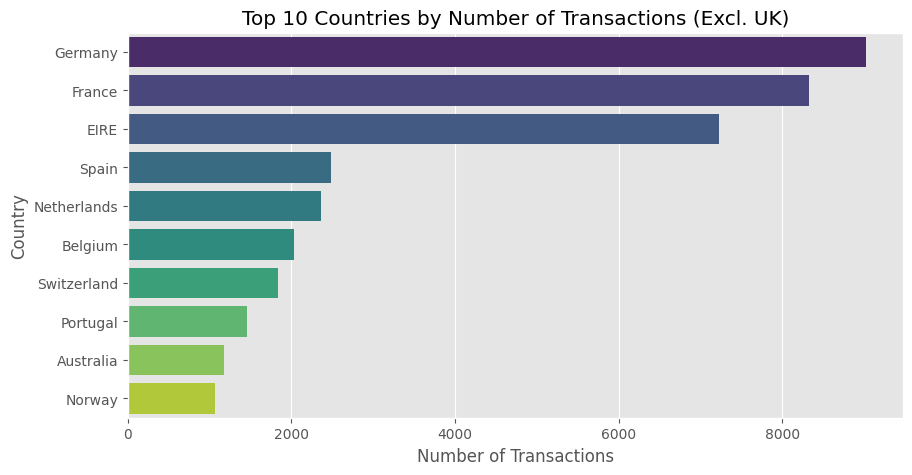

In [24]:
#Top 10 Countries by Number of Transactions

top_countries = df['Country'].value_counts().drop('United Kingdom').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Transactions (Excl. UK)")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show();

/tmp/ipython-input-21-1517000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')


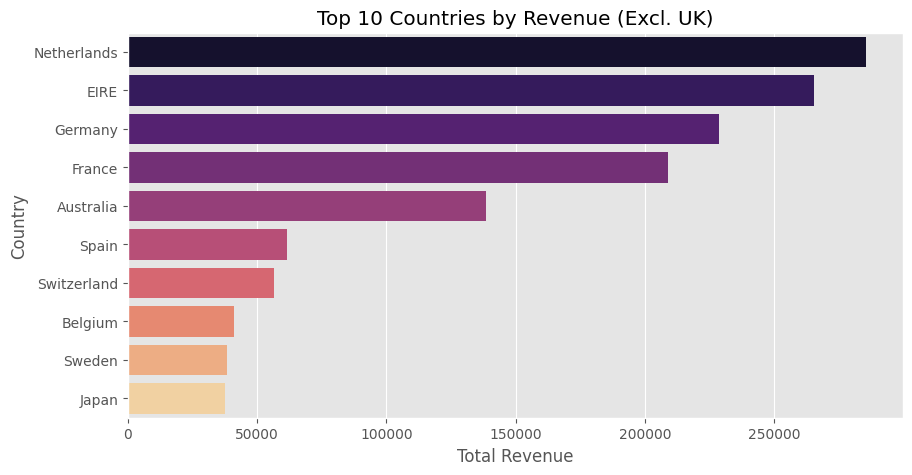

In [21]:
#Total Revenue by Country (Excluding UK)

country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')
plt.title("Top 10 Countries by Revenue (Excl. UK)")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-31-273516135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


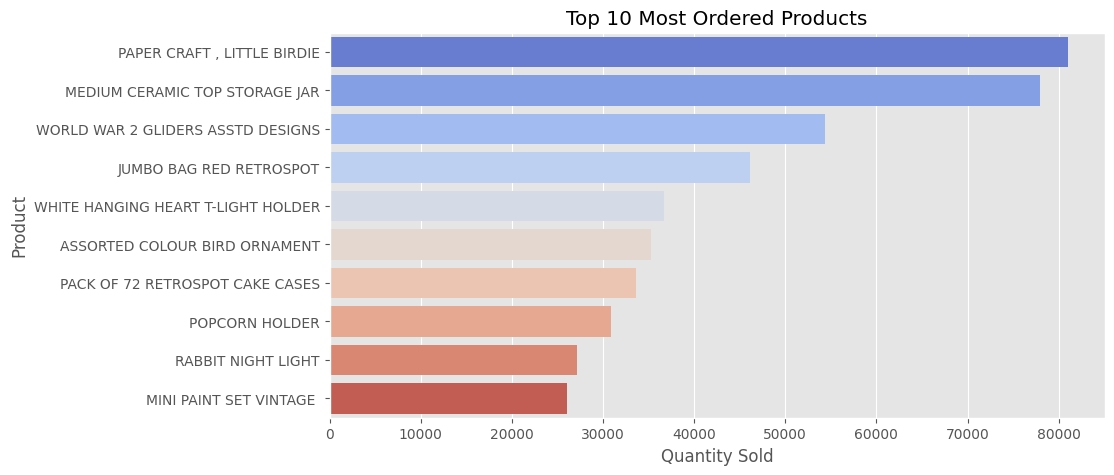

In [31]:
#Most Ordered Products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show();

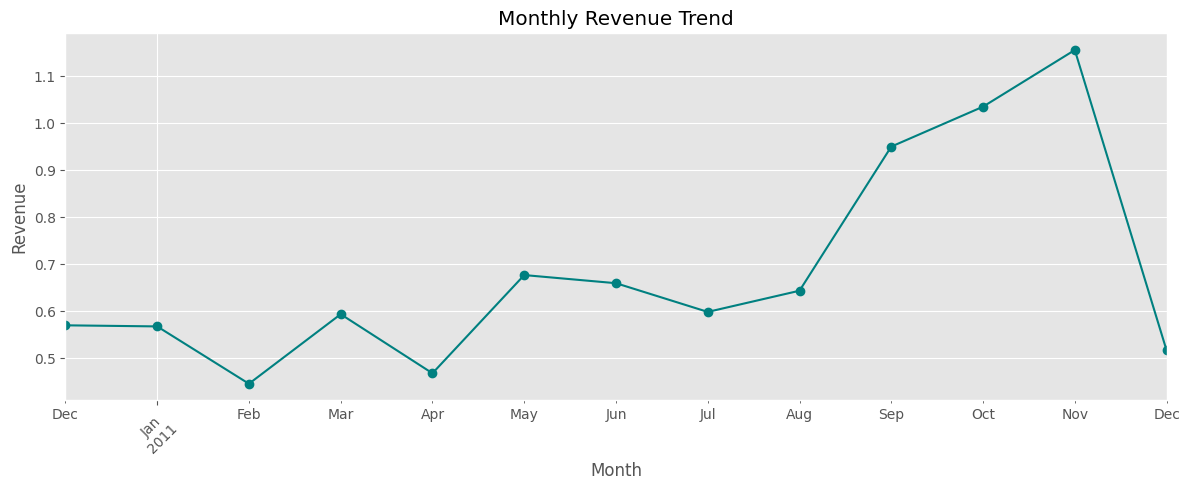

In [33]:
#Monthly Revenue Trend

df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()/1e6

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

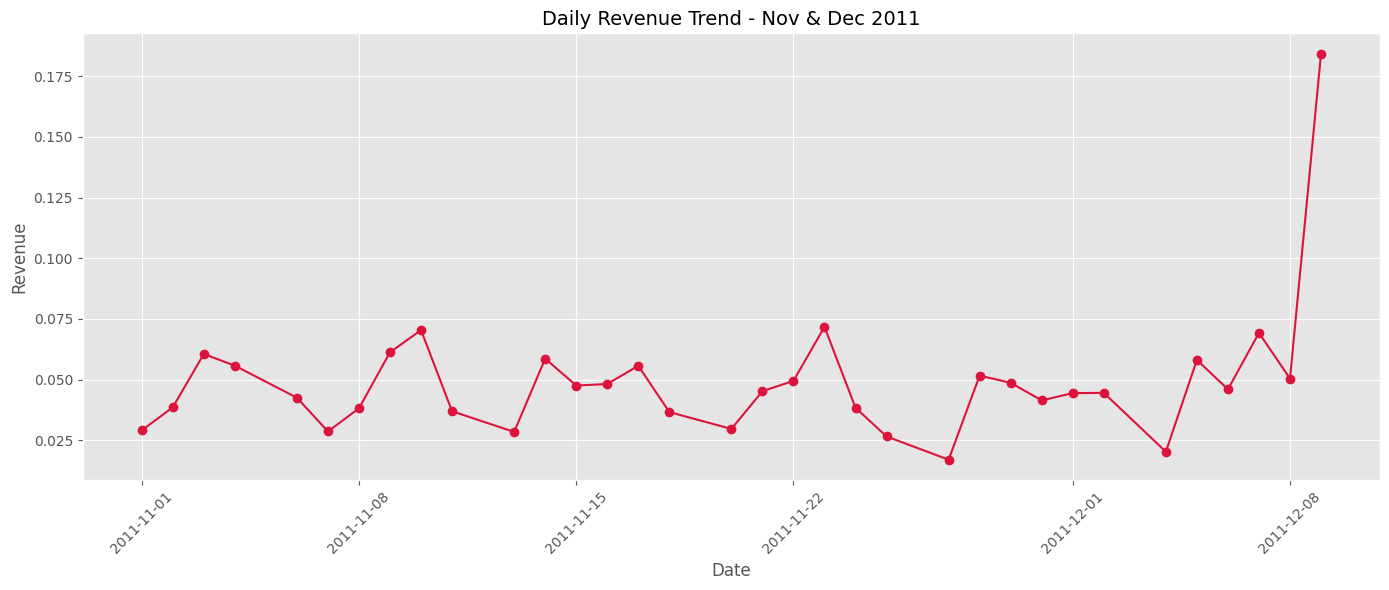

In [34]:
# Filter for November and December
nov_dec_df = df[(df['InvoiceDate'].dt.month.isin([11, 12])) &
                (df['InvoiceDate'].dt.year == 2011)]

# Group by day
daily_revenue = nov_dec_df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()/1e6

# Plot
plt.figure(figsize=(14,6))
daily_revenue.plot(marker='o', color='crimson')
plt.title("Daily Revenue Trend - Nov & Dec 2011", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

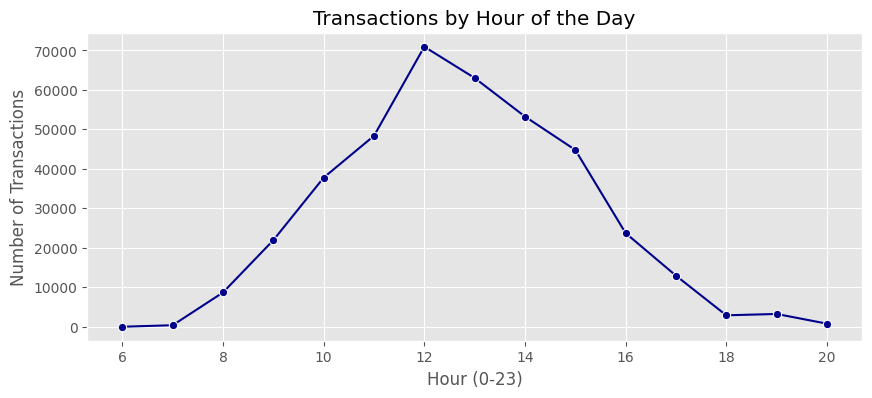

In [37]:
#Hour of Day with Highest Transactions

df['Hour'] = df['InvoiceDate'].dt.hour
hourly_txn = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_txn.index, y=hourly_txn.values, marker='o', color='darkblue')
plt.title("Transactions by Hour of the Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

In [46]:
df[df['Revenue'] <= 0]

df['Revenue'].describe()

,Revenue
count,392692.000000
mean,22.631500
std,311.099224
min,0.001000
25%,4.950000
50%,12.450000
75%,19.800000
max,168469.600000


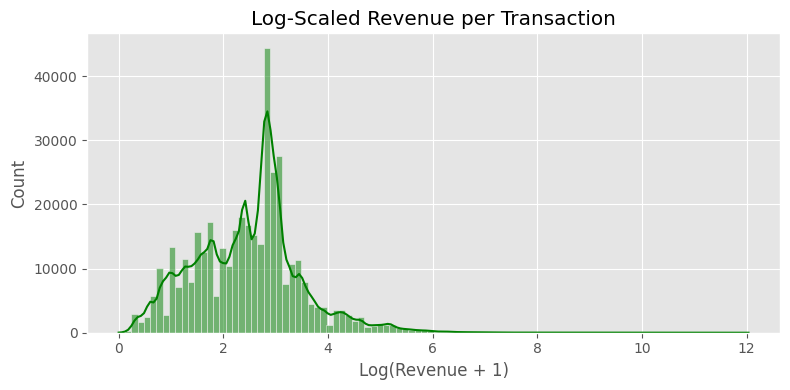

In [47]:
# log scale to handle skew

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(cleaned_df['Revenue']), bins=100, kde=True, color='green')
plt.title("Log-Scaled Revenue per Transaction")
plt.xlabel("Log(Revenue + 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Why log-transformation?
Revenue data is typically right-skewed:
Most customers spend a little, and a few customers spend a lot.

Log-scaling compresses high values, spreads out the lower ones, and helps reveal patterns in the majority of the data that would otherwise be squished.



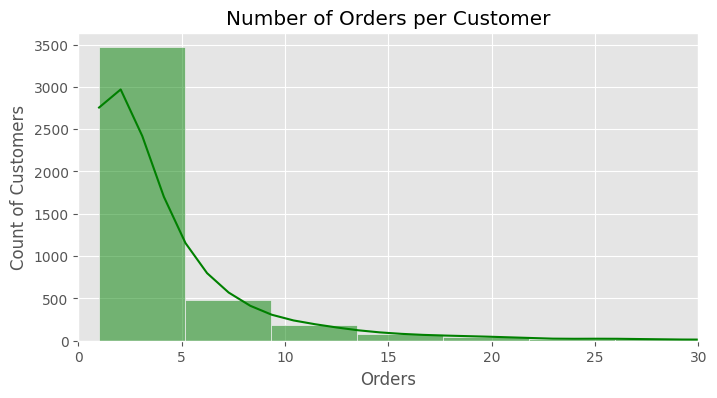

In [52]:
#Number of Orders Per Customer

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8,4))
sns.histplot(orders_per_customer, bins=50, kde=True, color='green')
plt.xlim(0, 30)
plt.title("Number of Orders per Customer")
plt.xlabel("Orders")
plt.ylabel("Count of Customers")
plt.show()


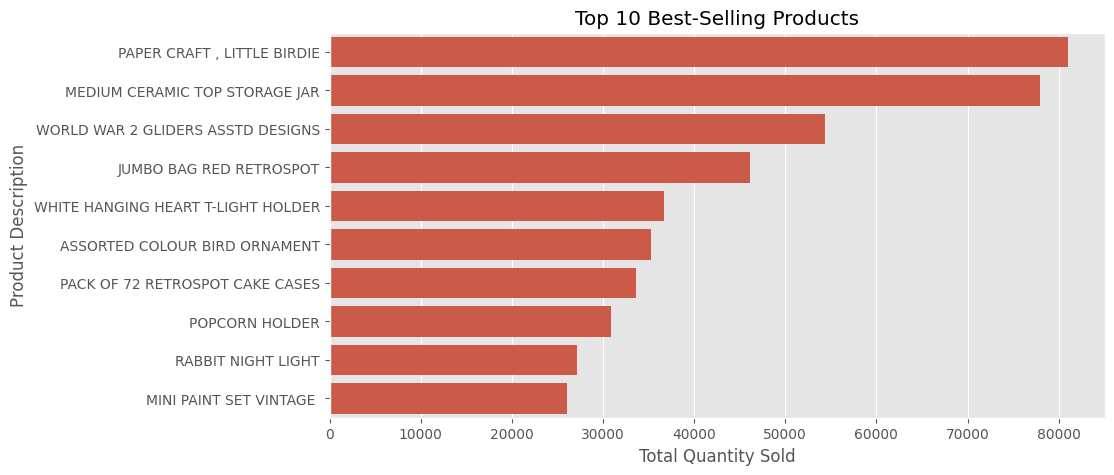

In [57]:
# Top-selling products

product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

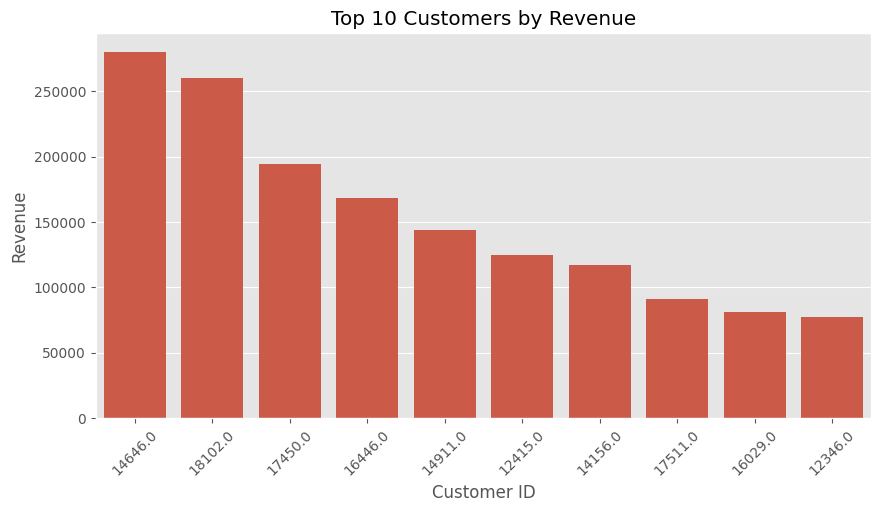

In [61]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)



plt.figure(figsize=(10,5))
sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

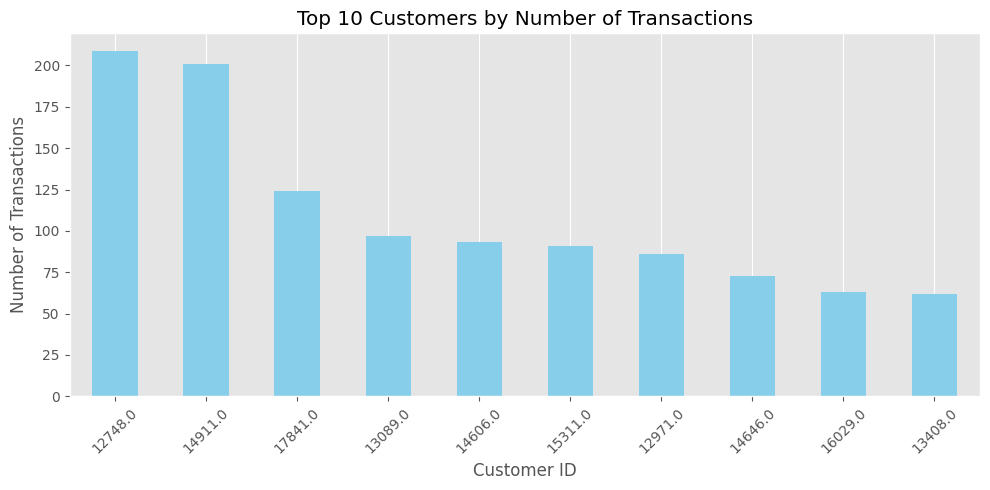

In [62]:
# Group by CustomerID and count unique InvoiceNo to get number of transactions
customer_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Get top 10 customers by number of transactions
top_transaction_customers = customer_transactions.sort_values(ascending=False).head(10)

# Plot the chart
top_transaction_customers.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Customers by Number of Transactions")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

Building our model

In [67]:
#Feature Engineering for CLV

import datetime as dt

# Latest date for recency calculation
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute metrics per customer
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).reset_index()

clv_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
clv_data.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


In [73]:
# # Step 1: Calculate IQR
# Q1 = clv_data['Monetary'].quantile(0.25)
# Q3 = clv_data['Monetary'].quantile(0.75)
# IQR = Q3 - Q1

# # Step 2: Define bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Step 3: Remove outliers
# df_no_outliers = clv_data[(clv_data['Monetary'] >= lower_bound) & (clv_data['Monetary'] <= upper_bound)]
# df_no_outliers.head()

In [74]:

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add Revenue column if not already present
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Reference date (max InvoiceDate + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouped customer data
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x: (reference_date - x.max()).days,      # Recency
                    lambda x: (x.max() - x.min()).days,             # Tenure
                    lambda x: (x.sort_values().diff().dropna().mean()).days],  # Recency Trend
    'InvoiceNo': 'nunique',                                         # Frequency
    'Revenue': 'sum',                                               # Monetary
})

# Flatten multi-level column names
clv_data.columns = ['Recency', 'Tenure', 'Avg_Days_Between_Purchases', 'Frequency', 'Monetary']
clv_data = clv_data.reset_index()

# Average Order Value
clv_data['AvgOrderValue'] = clv_data['Monetary'] / clv_data['Frequency']
clv_data.head()


,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue
0,12346.0,326,0,NaN,1,77183.60,77183.600000
1,12347.0,2,365,2.0,7,4310.00,615.714286
2,12348.0,75,282,9.0,4,1797.24,449.310000
3,12349.0,19,0,0.0,1,1757.55,1757.550000
4,12350.0,310,0,0.0,1,334.40,334.400000


In [75]:
Q1 = clv_data['Monetary'].quantile(0.25)
Q3 = clv_data['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_no_outliers = clv_data[(clv_data['Monetary'] >= lower_bound) & (clv_data['Monetary'] <= upper_bound)]
df_no_outliers.head()

,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue
2,12348.0,75,282,9.0,4,1797.24,449.310
3,12349.0,19,0,0.0,1,1757.55,1757.550
4,12350.0,310,0,0.0,1,334.40,334.400
5,12352.0,36,260,3.0,8,2506.04,313.255
6,12353.0,204,0,0.0,1,89.00,89.000


In [76]:
#Linear regression is sensitive to scale, so we’ll normalize the data.

from sklearn.preprocessing import StandardScaler

features = ['Recency', 'Frequency', 'AvgOrderValue', 'Tenure']
scaler = StandardScaler()
clv_scaled = scaler.fit_transform(df_no_outliers[features])

# Create final DataFrame
X = pd.DataFrame(df_no_outliers, columns=features)
y = df_no_outliers['Monetary']  # We can predict Monetary or CLV

In [77]:
y.describe()

,Monetary
count,3913.000000
mean,883.921910
std,827.868248
min,3.750000
25%,283.150000
50%,584.320000
75%,1244.590000
max,3683.860000


In [79]:
# Convert scaled array back to DataFrame for easy checking
scaled_df = pd.DataFrame(clv_scaled, columns=features)

# Print the mean and standard deviation of each column
print("Means after scaling:\n", scaled_df.mean())
print("\nStandard deviations after scaling:\n", scaled_df.std())

Means after scaling:
 Recency         -5.084385e-17
Frequency       -9.079258e-17
AvgOrderValue   -1.815852e-16
Tenure           6.991029e-17
dtype: float64

Standard deviations after scaling:
 Recency          1.000128
Frequency        1.000128
AvgOrderValue    1.000128
Tenure           1.000128
dtype: float64


In [81]:
X.head(20)

,Recency,Frequency,AvgOrderValue,Tenure
2,75,4,449.310000,282
3,19,1,1757.550000,0
4,310,1,334.400000,0
5,36,8,313.255000,260
6,204,1,89.000000,0
7,232,1,1079.400000,0
8,214,1,459.400000,0
9,23,3,937.143333,302
11,2,2,584.030000,149
13,52,3,887.353333,148


In [82]:
len(y)

3913

In [83]:
#Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

# Results container
results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R^2 Score": round(r2, 4),
        "RMSE": round(rmse, 4)
    })

# Display Results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="R^2 Score", ascending=False)
print(results_df)

                      Model  R^2 Score      RMSE
5               Extra Trees     0.9986   29.6433
4             Random Forest     0.9973   40.6179
7                   XGBoost     0.9968   44.7223
6         Gradient Boosting     0.9944   59.1323
3             Decision Tree     0.9943   59.3210
0         Linear Regression     0.8237  331.1697
1          Ridge Regression     0.8237  331.1757
2          Lasso Regression     0.8236  331.2604
8       K-Nearest Neighbors     0.6719  451.8032
9  Support Vector Regressor     0.2330  690.8075


/tmp/ipython-input-86-1246110799.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=df_results_sorted, palette="viridis")
/tmp/ipython-input-86-1246110799.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=df_results_sorted, palette="magma")


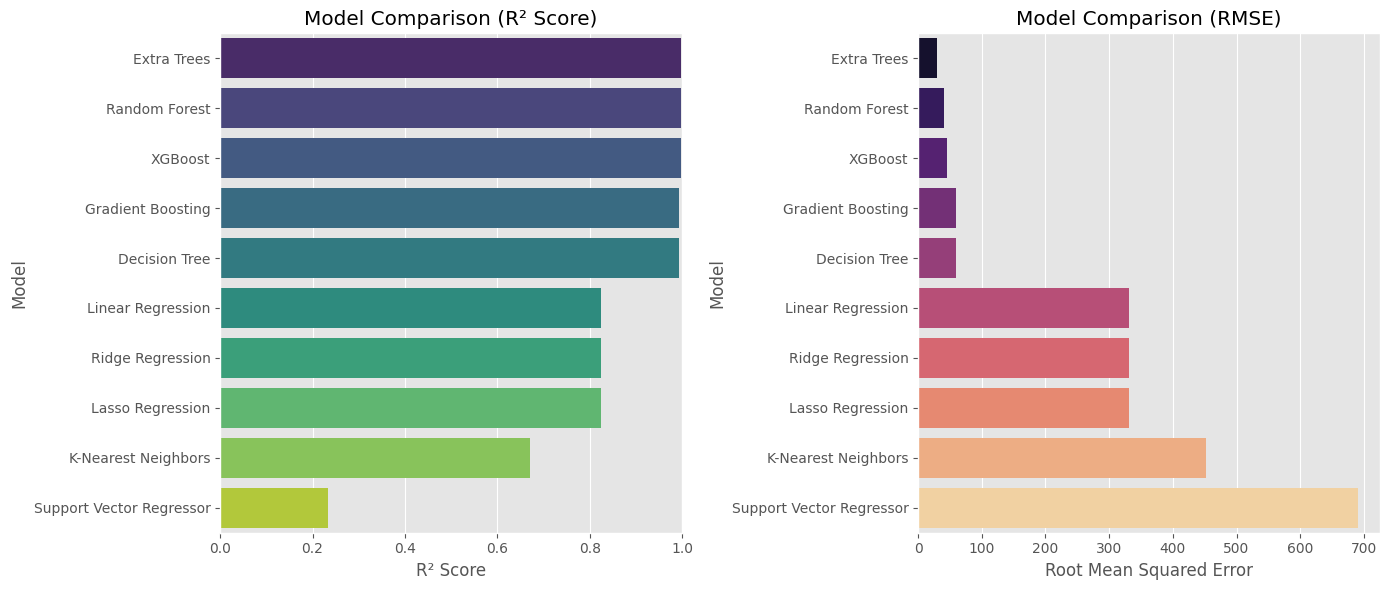

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your model performance data
data = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Decision Tree", "Random Forest", "Extra Trees",
        "Gradient Boosting", "XGBoost", "K-Nearest Neighbors",
        "Support Vector Regressor"
    ],
    "R2 Score": [
        0.8237, 0.8237, 0.8236,
        0.9943, 0.9973, 0.9986,
        0.9944, 0.9968, 0.6719,
        0.2330
    ],
    "RMSE": [
        331.1697, 331.1757, 331.2604,
        59.3210, 40.6179, 29.6433,
        59.1323, 44.7223, 451.8032,
        690.8075
    ]
}

df_results = pd.DataFrame(data)

# Sort by R2 Score
df_results_sorted = df_results.sort_values(by="R2 Score", ascending=False)

# Plot
plt.figure(figsize=(14, 6))

# R² Score
plt.subplot(1, 2, 1)
sns.barplot(x="R2 Score", y="Model", data=df_results_sorted, palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score")
plt.xlim(0, 1)

# RMSE
plt.subplot(1, 2, 2)
sns.barplot(x="RMSE", y="Model", data=df_results_sorted, palette="magma")
plt.title("Model Comparison (RMSE)")
plt.xlabel("Root Mean Squared Error")

plt.tight_layout()
plt.show()

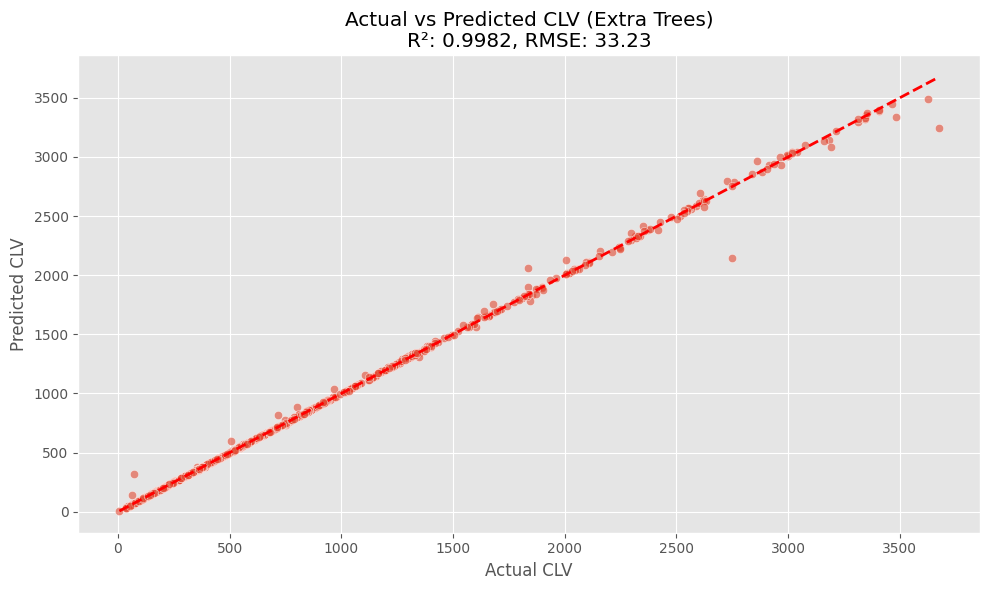

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the Extra Trees model
extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred_et = extra_trees.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_et, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title(f'Actual vs Predicted CLV (Extra Trees)\nR²: {r2_score(y_test, y_pred_et):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_et)):.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()

**CHECKING FOR OVERFITTING**
1. compare train r**2 and test r**2
2. Use cross val score
3. residual values
4. checking feat import if the model is not dominated by two feat only

In [88]:
# R² scores
train_r2 = extra_trees.score(X_train, y_train)
test_r2 = extra_trees.score(X_test, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")

Train R²: 1.0000
Test R²:  0.9982


In [89]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(extra_trees, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

Cross-validation R² scores: [0.99719389 0.99566157 0.9960776  0.99707008 0.99731576]
Mean CV R²: 0.9967


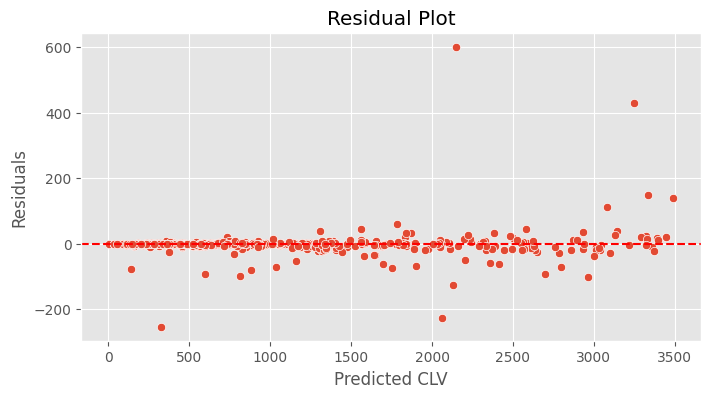

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = extra_trees.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CLV")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

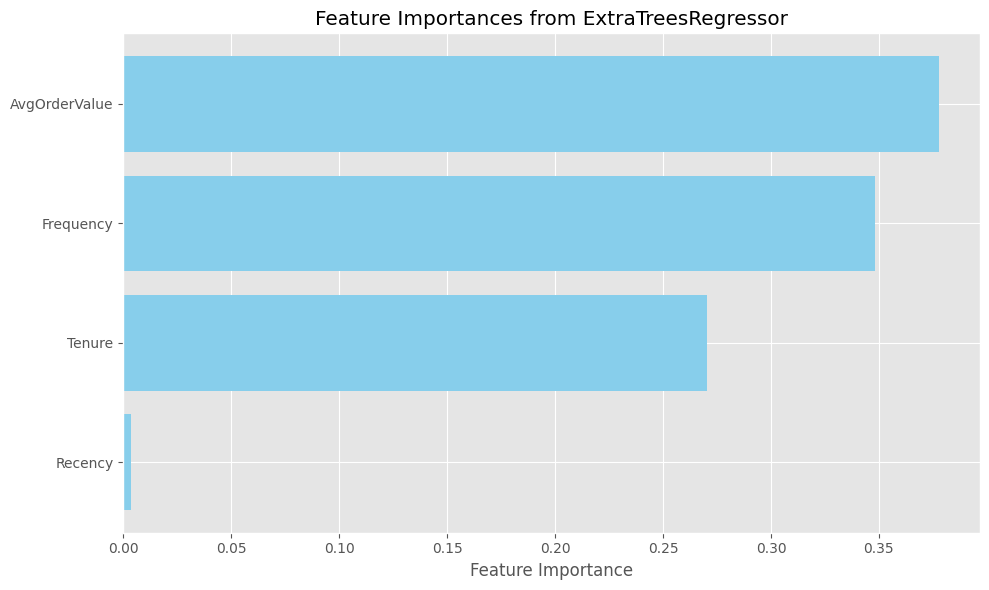

In [93]:
# Get feature importances
importances = extra_trees.feature_importances_
features = X_train.columns  # or your feature list

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important on top
plt.xlabel("Feature Importance")
plt.title("Feature Importances from ExtraTreesRegressor")
plt.tight_layout()
plt.show()